# Machine Learning and Data Science
# Assignment 3
# Apple Quality Classification
Dataset: [https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

# Contributors
### Faris Abu Farha 1200546
### Omar Masalmah   1200060

## 1. import important libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dark theme
plt.style.use('dark_background')
import seaborn as sns


# 2. Load Data

In [2]:
df = pd.read_csv('dataset/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# 3. EDA (Exploratory Data Analysis)

In [3]:
print('----------------')
print('Data shape')
print(df.shape)
print('----------------')

df.info()

----------------
Data shape
(4001, 9)
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


we noticed that every attribute has 4000 values except for the last one which has 4001, let's check why

Check for missing values

In [4]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [5]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


we noticed only one row contains Null values, it turned out to be the last row, this row is  for author rights, so we will drop it 

In [6]:
#remove rows with missing values
df = df.dropna()
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB
None


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [7]:
# It has been noticed that ID column is repeated, so we will drop it
df = df.drop('A_id', axis=1)  # axis = 1 means column
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [9]:
# Acidity Column Dtype is 'object' so we will convert it to float64 
df['Acidity'] = pd.to_numeric(df['Acidity'],
                              errors='coerce')  # errors='coerce' means if there is any error, it will be converted to NaN
print('----------------')
print('Check for NaN')
print(df.isnull().sum())
print('----------------')

df.info()

----------------
Check for NaN
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64
----------------
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Check for duplicate rows

In [10]:
print('----------------')
print('Check for duplicate rows')
print(df.duplicated().sum())
print('----------------')


----------------
Check for duplicate rows
0
----------------


Univariate analysis for each attribute 

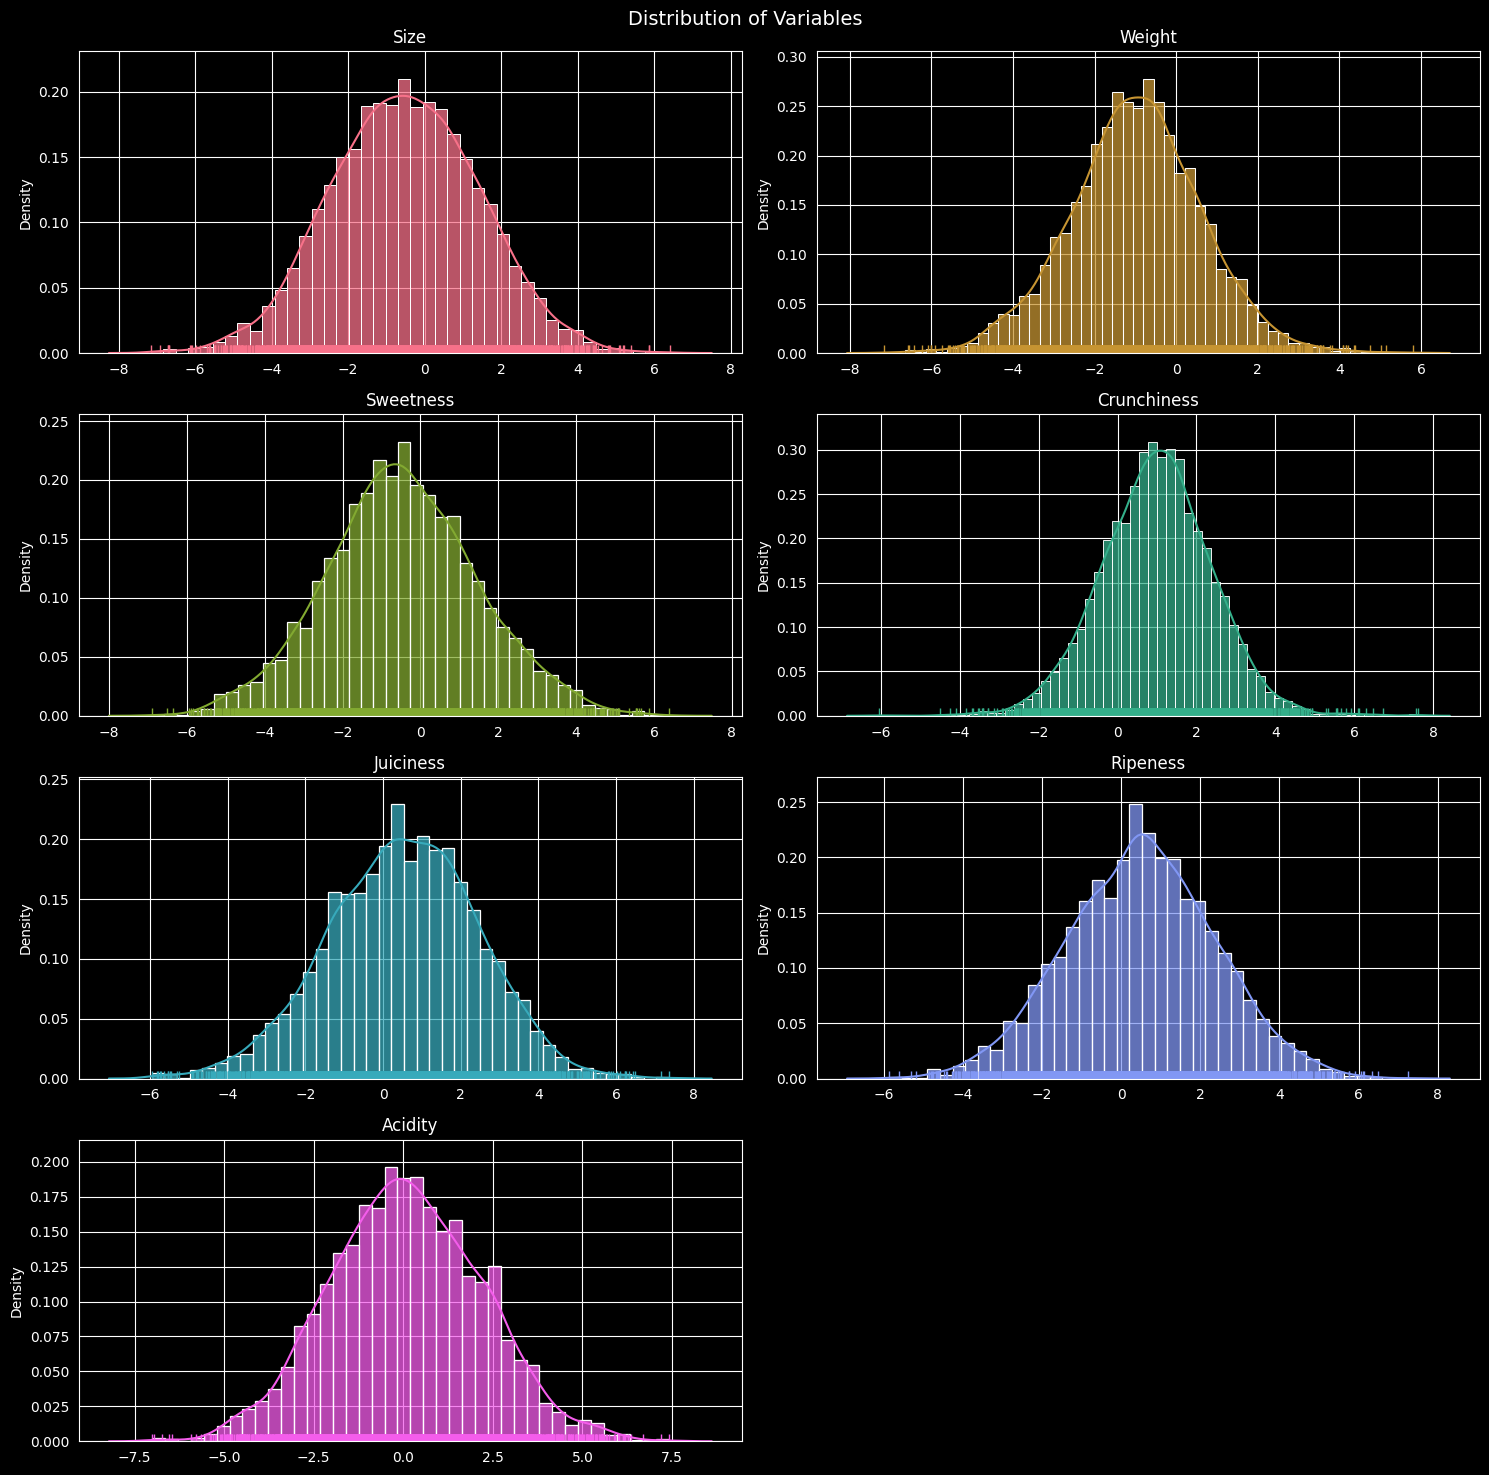

In [11]:
# Univariate analysis for each attribute
cols = df.columns[:-1]
colors = sns.color_palette('husl', len(cols))  # husl = hue saturation lightness

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # 3 rows, 3 columns 
axs = axs.flatten()  # flatten the 2D array to 1D array

for i, col in enumerate(cols):
    sns.kdeplot(df[col], ax=axs[i], color=colors[i])  # kdeplot = kernel density estimation plot 
    sns.histplot(df[col], ax=axs[i], color=colors[i], stat='density')  # histplot = histogram plot 
    sns.rugplot(df[col], ax=axs[i],
                color=colors[i])  # rugplot = draw a dash mark for every point on a univariate distribution

    axs[i].set_xlabel('')  # remove x label to avoid redundancy
    axs[i].set_title(col)
    plt.tight_layout()

fig.suptitle("Distribution of Variables", fontsize=14)
fig.delaxes(ax=axs[len(cols)])  # delete the last plot
fig.tight_layout()


In [12]:
# statistical summary for each attribute
df.describe().T  # 

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [13]:
from scipy import stats  # import scipy.stats for skewness and kurtosis

# kurtosis and skewness

print('------------------------------------------------------------')
print('Kurtosis & Skewness')
print('------------------------------------------------------------')
cols = df.columns[:-1]
for col in cols:
    print(f"{col}: Kurtosis {stats.kurtosis(df[col])} | Skewness {stats.skew(df[col])}")
    print('------------------------------------------------------------')


------------------------------------------------------------
Kurtosis & Skewness
------------------------------------------------------------
Size: Kurtosis -0.08473614412348018 | Skewness -0.0024360294426308085
------------------------------------------------------------
Weight: Kurtosis 0.35710154859527776 | Skewness 0.0031004069327457127
------------------------------------------------------------
Sweetness: Kurtosis 0.01295451538904846 | Skewness 0.08381834394973907
------------------------------------------------------------
Crunchiness: Kurtosis 0.7196186480277955 | Skewness 0.00023001961531377834
------------------------------------------------------------
Juiciness: Kurtosis 0.027199863543157843 | Skewness -0.11337829624193697
------------------------------------------------------------
Ripeness: Kurtosis -0.07326004626903648 | Skewness -0.008760810490611875
------------------------------------------------------------
Acidity: Kurtosis -0.09483426783221782 | Skewness 0.05576253

In [14]:
def check_normality(data, alpha=0.05):
    """
    Check if the data is normally distributed or not
    """
    stat, p = stats.normaltest(data)
    if p >= alpha:
        return True
    else:
        return False


In [15]:
normal_dist_attributes = []
not_normal_dist_attributes = []

for col in cols:
    normal_dist_attributes.append(col) if check_normality(df[col]) else not_normal_dist_attributes.append(col)

print('NOT  Normal distributed attributes:')
print(len(not_normal_dist_attributes))
print(not_normal_dist_attributes)

print('----------------')
print('Normal distributed attributes:')
print(len(normal_dist_attributes))
print(normal_dist_attributes)

NOT  Normal distributed attributes:
3
['Weight', 'Crunchiness', 'Juiciness']
----------------
Normal distributed attributes:
4
['Size', 'Sweetness', 'Ripeness', 'Acidity']


Quality
good    2004
bad     1996
Name: count, dtype: int64


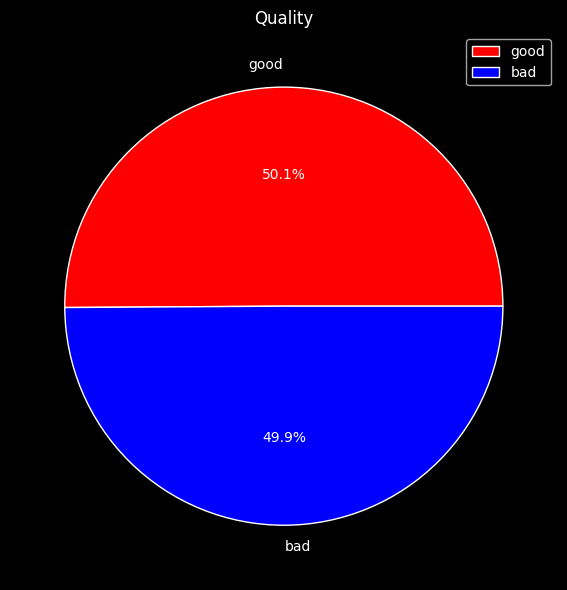

In [16]:
# plot pie chart of label and count 
# 
print(df['Quality'].value_counts())

plt.figure(figsize=(6, 6))
plt.pie(df['Quality'].value_counts(), labels=['good', 'bad'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.legend()
plt.title('Quality')
plt.tight_layout()
plt.show()


class distribution is balanced so we don't need to do any sampling, we will use the data as it is, but we will convert the label to binary values for better processing, good = 1, bad = 0, we will do this in the preprocessing section. Accuarcy will be a good metric for this dataset

## Correlation       

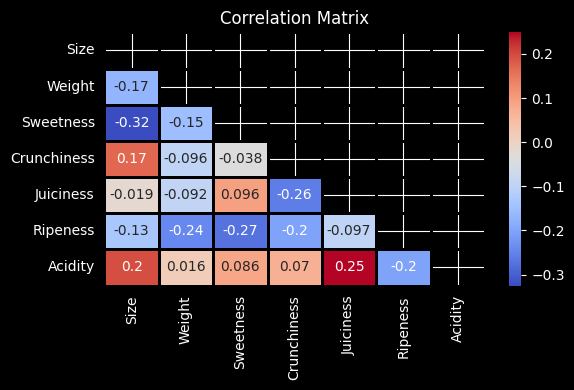

In [17]:
# The correlation matrix is a table showing correlation coefficients between variables. 1 means positive correlation, -1 means negative correlation, 0 means no correlation
cols = df.columns[:-1]
correlation_matrix = df[cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # mask to hide the upper triangle of the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=1,
            linecolor='black')  # annot = True to show the values inside the cells

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


We can see that there are no strong correlations between the attributes.

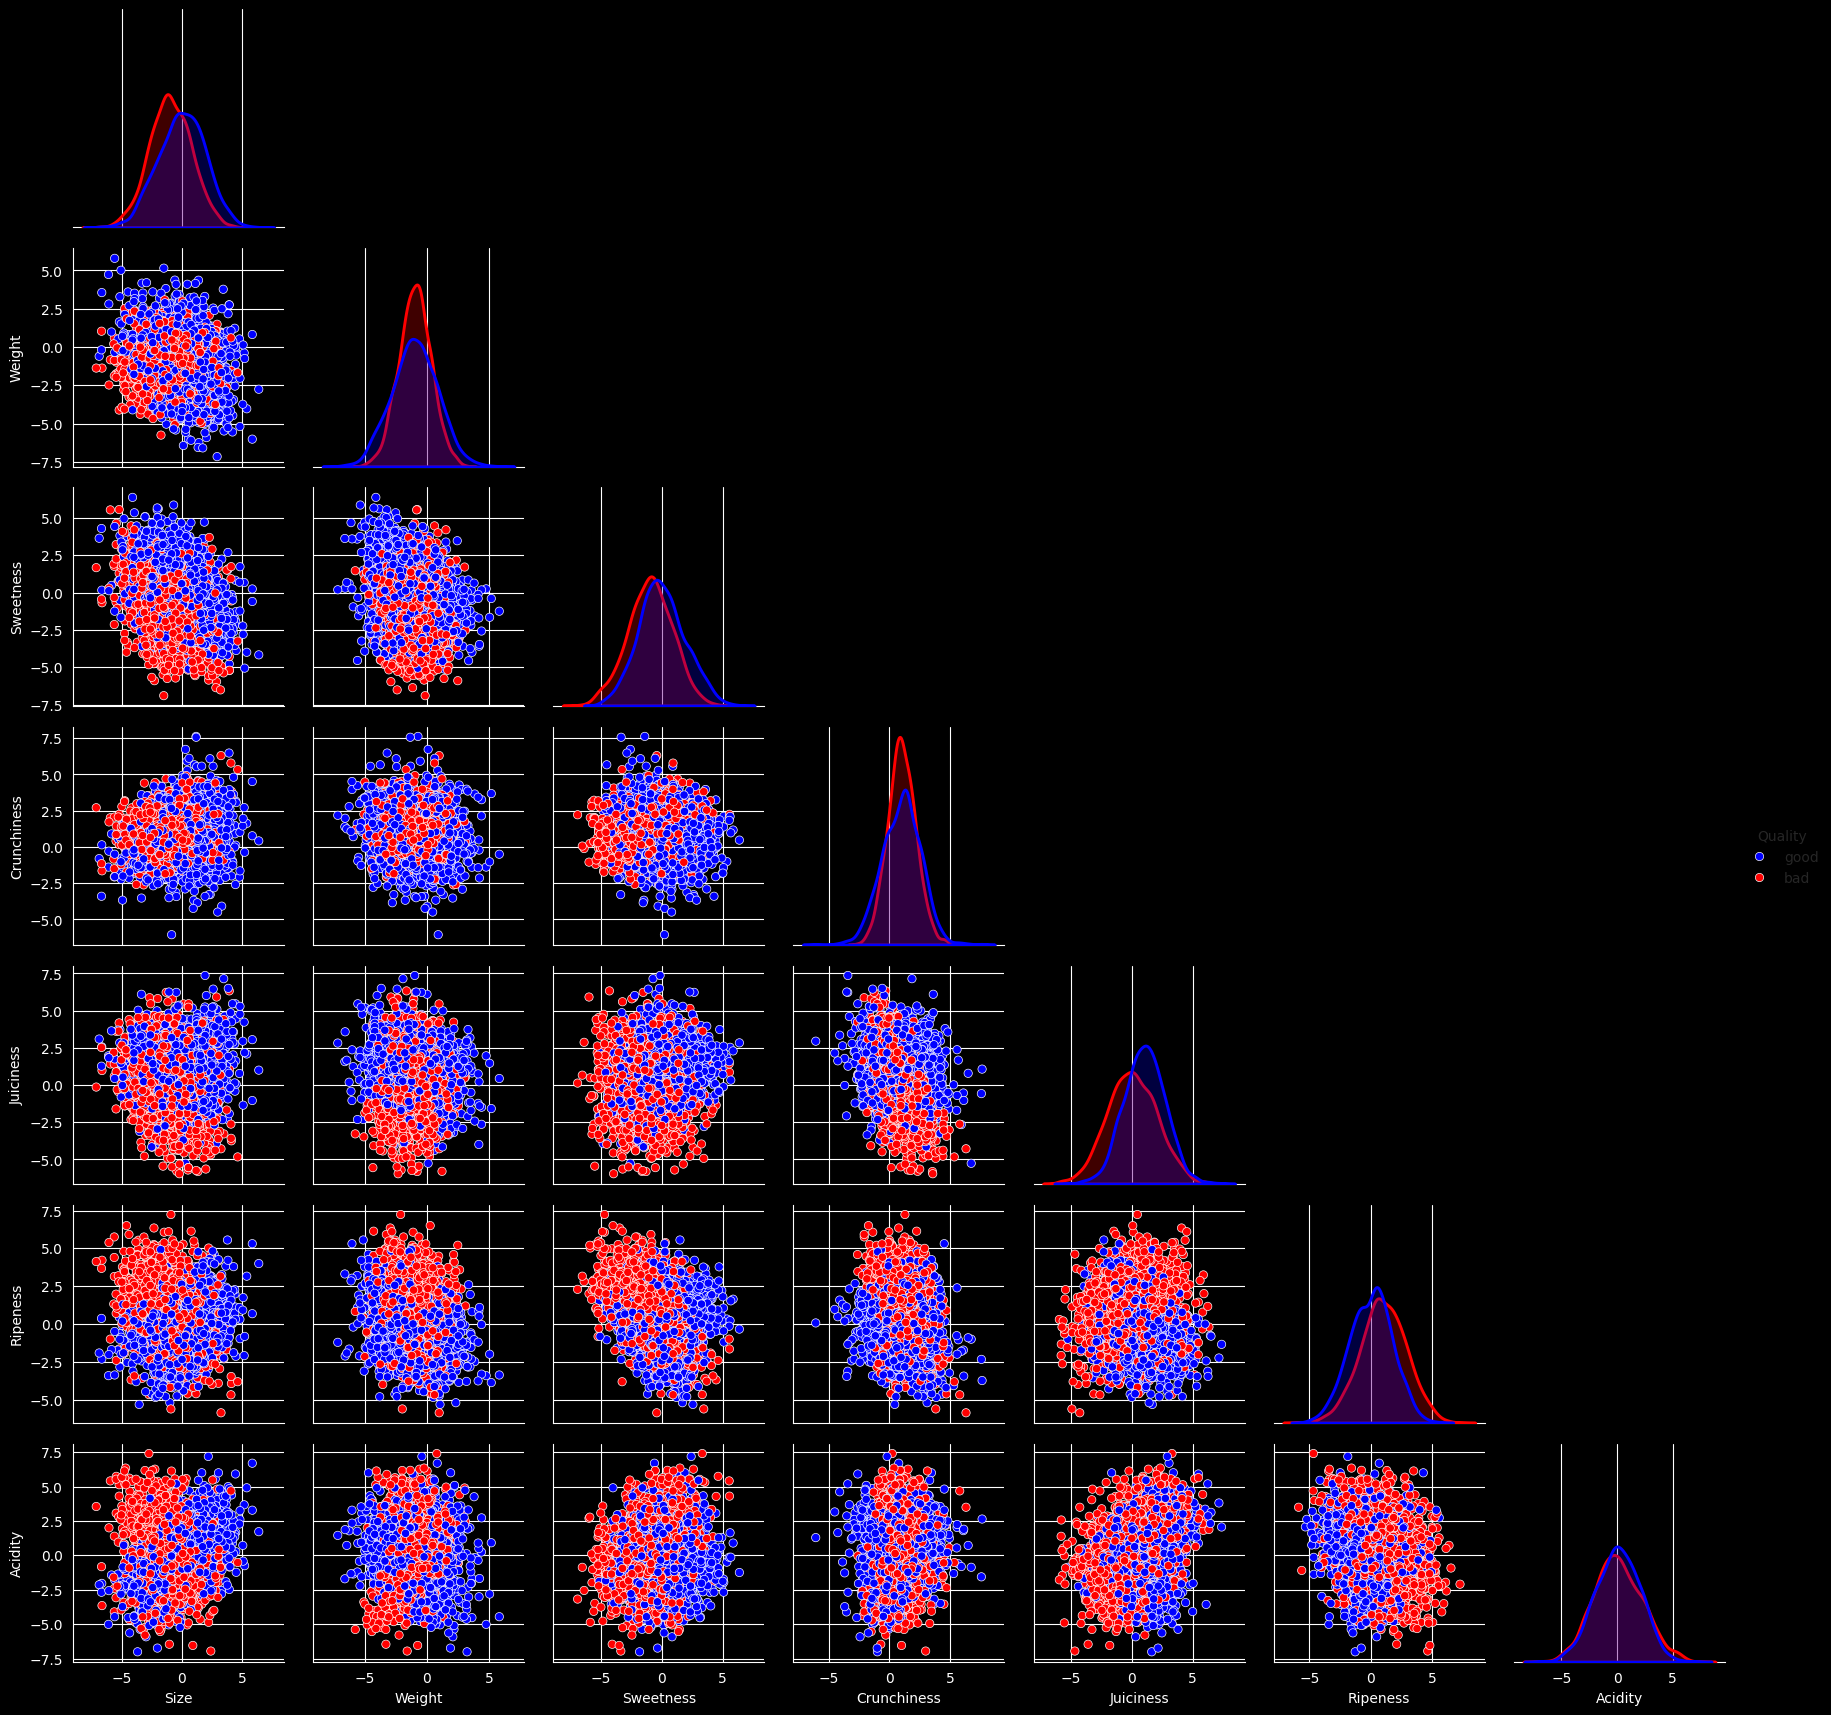

In [18]:
custom_platte = {'good': '#0000ff', 'bad': '#ff0000'}  # red, blue
pair_grid = sns.PairGrid(df, hue='Quality', palette=custom_platte,
                         corner=True)  # hue = label, palette = color palette corner = True to show only the lower triangle  husl = hue saturation lightness
pair_grid.map_lower(sns.scatterplot)  # scatterplot for lower triangle
pair_grid.map_diag(sns.kdeplot, fill=True, linewidth=2.1)  # kdeplot for diagonal

sns.set_style('darkgrid')
pair_grid.add_legend()
plt.show()

The above  figure shows the relationship between each pair of attributes

# 4. Preprocessing

In [19]:
print(df['Quality'].value_counts())
df.head()


Quality
good    2004
bad     1996
Name: count, dtype: int64


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


## Converting Quality column to binary values for better processing
since we only have two classes, we will convert the label to binary values for better processing, good = 1, bad = 0

In [20]:
df['Quality'] = (df['Quality'] == 'good').astype(int)  # good = 1, bad = 0

In [21]:
df['Quality'].value_counts()
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Splitting the data into X and y


In [22]:
X = df.iloc[:, :-1]
y = df['Quality']

print(X.shape)
print(y.shape)


(4000, 7)
(4000,)


## Splitting the data into train, validation, and test sets

In [23]:
SEED = 42
from sklearn.model_selection import train_test_split as tts  # import train_test_split function

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2,
                                       random_state=SEED)  # split the data into train and test sets
# random_state=42 is used for reproducibility. This means that the split will be the same every time the code is run, which is useful for debugging and comparing models. The number 42 is arbitrary and any number could be used.
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.2,
                                     random_state=SEED)  # split the train set into train and validation sets

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_test.shape)

print("Y train value counts:")
print(y_train.value_counts())
print('----------------')
print('Y validation value counts:')
print(y_val.value_counts())
print('----------------')
print('Y test value counts:')
print(y_test.value_counts())
print('----------------')


(2560, 7)
(640, 7)
(800, 7)
(800, 7)
Y train value counts:
Quality
0    1280
1    1280
Name: count, dtype: int64
----------------
Y validation value counts:
Quality
1    325
0    315
Name: count, dtype: int64
----------------
Y test value counts:
Quality
0    401
1    399
Name: count, dtype: int64
----------------


Data is perfectly split into train, validation, and test sets

## 5. Modeling

### 5.1 Base Line Model KNN

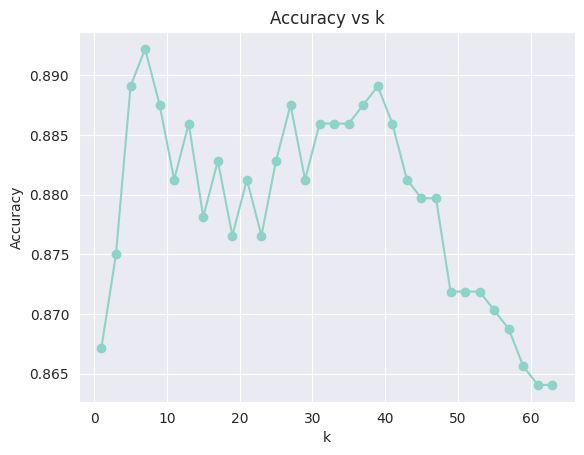

Best k: 7


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_k = [i for i in range(1, 64, 2)]
train_acc = []

for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    train_acc.append(accuracy_score(y_val, y_pred))

plt.plot(test_k, train_acc, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

best_validation_k = test_k[train_acc.index(max(train_acc))]
print(f'Best k: {best_validation_k}')




Predictions are made by averaging across the k neighbours. Where k is larger, the distance is then larger, which defeats the principle behind kNN - that neighbours that are nearer have similar densities or classes.



Train and test KNN for K=1, K= 3, and K = best_validation_k

In [25]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_validation_best = KNeighborsClassifier(n_neighbors=best_validation_k)
knn_models = [knn_1, knn_3, knn_validation_best]

for model in knn_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('---------------- K = {} ----------------'.format(model.n_neighbors))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('--------------------------------------')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('--------------------------------------')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    print('--------------------------------------')

---------------- K = 1 ----------------
Accuracy: 0.88875
--------------------------------------
Confusion Matrix: 
[[352  49]
 [ 40 359]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       401
           1       0.88      0.90      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

--------------------------------------
---------------- K = 3 ----------------
Accuracy: 0.88875
--------------------------------------
Confusion Matrix: 
[[355  46]
 [ 43 356]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       401
           1       0.89      0.89      0.89       399

    accuracy                           0.89       800
   macro avg

## 5.2 Choose 2 more classifiers and train and test them

In order to pick 2 more classifiers, we will test some popular classifiers on the validation test and see  which classifiers are the best for our dataset, and pick best 2 classifiers

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [27]:
# create a list of classifiers
classifiers = [
    LogisticRegression(random_state=SEED, n_jobs=-1),
    SVC(random_state=SEED, probability=True),
    GaussianNB(),
    RandomForestClassifier(random_state=SEED),
    ExtraTreesClassifier(random_state=SEED),
    XGBClassifier(random_state=SEED, n_jobs=-1),
]


In [28]:
# train and test the classifiers
sorted_classifiers = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    print('---------------- {} ----------------'.format(classifier.__class__.__name__))
    print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
    sorted_classifiers.append((classifier.__class__.__name__, accuracy_score(y_val, y_pred)))


---------------- LogisticRegression ----------------
Accuracy: 0.73125
---------------- SVC ----------------
Accuracy: 0.8828125
---------------- GaussianNB ----------------
Accuracy: 0.7640625
---------------- RandomForestClassifier ----------------
Accuracy: 0.8703125
---------------- ExtraTreesClassifier ----------------
Accuracy: 0.8859375
---------------- XGBClassifier ----------------
Accuracy: 0.8796875


/tmp/ipykernel_57851/997301268.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('rainbow')


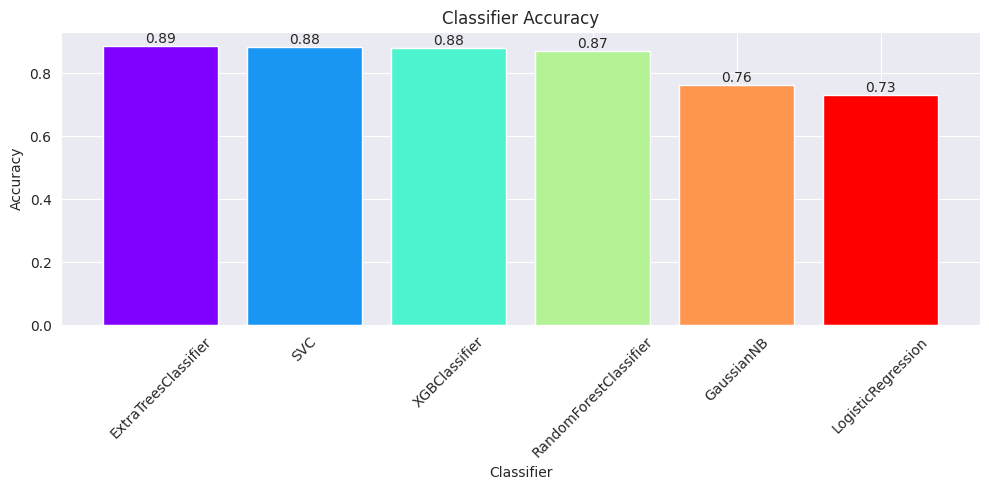

In [29]:
import matplotlib.cm as cm

sorted_classifiers.sort(key=lambda x: x[1], reverse=True)

# plot classifier accuracy
color_map = cm.get_cmap('rainbow')

# Generate a list of colors
colors = color_map(np.linspace(0, 1, len(sorted_classifiers)))

plt.figure(figsize=(10, 5))

# Create the bar chart with different colors for each bar
bars = plt.bar([classifier[0] for classifier in sorted_classifiers],
               [classifier[1] for classifier in sorted_classifiers],
               color=colors)

plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')

# Add the value of each bar on top of it
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

According to the above graph, we will choose SVC and Extra Trees Classifier


#### Possible Reasons for Higher Accuracy in SVC and ExtraTreesClassifier

* The dataset may have non-linear relationships that ExtraTrees and SVC are capable of capturing.
* There might be complex decision boundaries in the feature space, and both ExtraTrees and SVC are good at handling such scenarios.
* The ensemble nature of ExtraTrees helps in reducing overfitting, and the regularization properties of SVM (especially with a well-chosen kernel) contribute to better generalization.
* The dataset may contain outliers or noise, and both ExtraTrees and SVM are robust to some extent against such issues.

#### SVC
It is particularly effective in high-dimensional spaces and is capable of fitting complex decision boundaries. It also allows for fine control of the decision boundary through the use of different kernel functions and the regularization parameter C. This might have allowed the SVC to better capture the patterns in our data, leading to improved performance.  

#### Extra Trees Classifier 
It is an ensemble learning method that fits a number of randomized decision trees on various sub-samples of the dataset. It uses averaging to improve the predictive accuracy and control over-fitting. The strength of the Extra Trees Classifier comes from creating a diverse set of classifiers through the use of randomization. This diversity can lead to a model that is more robust and has better generalization performance


### 5.2 SVC


#### SVC Hyperparameter tuning

In [30]:
# SVC Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.854 total time=   0.2s
[CV 2/5] END .............................C=0.1;, score=0.814 total time=   0.2s
[CV 3/5] END .............................C=0.1;, score=0.836 total time=   0.2s
[CV 4/5] END .............................C=0.1;, score=0.846 total time=   0.2s
[CV 5/5] END .............................C=0.1;, score=0.848 total time=   0.2s
[CV 1/5] END ...............................C=1;, score=0.881 total time=   0.2s
[CV 2/5] END ...............................C=1;, score=0.863 total time=   0.1s
[CV 3/5] END ...............................C=1;, score=0.879 total time=   0.1s
[CV 4/5] END ...............................C=1;, score=0.883 total time=   0.1s
[CV 5/5] END ...............................C=1;, score=0.895 total time=   0.1s
[CV 1/5] END ..............................C=10;, score=0.889 total time=   0.1s
[CV 2/5] END ..............................C=10;,

Ater testing different values for C, we found that C=100 is the best value

In [31]:
from sklearn.svm import SVC

BEST_C = 100
svc_model = SVC(probability=True, random_state=SEED, C=BEST_C)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('--------------------------------------')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('--------------------------------------')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print('--------------------------------------')



Accuracy: 0.91625
--------------------------------------
Confusion Matrix: 
[[371  30]
 [ 37 362]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       401
           1       0.92      0.91      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800

--------------------------------------


## 5.3 Extra Trees Classifier

#### Extra Trees Classifier Hyperparameter tuning

In [32]:
# Define the parameter values that should be searched
n_estimators_range = [50, 100, 200, 500, 1000,  1500,  2100, 3000]


param_grid = dict(n_estimators=n_estimators_range)

grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy') # cv = cross validation = 5 folds

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

{'mean_fit_time': array([0.14533157, 0.27421594, 0.53511128, 1.3296092 , 2.74137526,
       4.03202276, 5.73118811, 8.73873057]), 'std_fit_time': array([0.00831857, 0.01750628, 0.01184449, 0.01611137, 0.09129829,
       0.04281903, 0.19015875, 1.04417387]), 'mean_score_time': array([0.01245079, 0.02157292, 0.03938904, 0.09620814, 0.19711838,
       0.28376737, 0.40733857, 0.58348794]), 'std_score_time': array([0.00055185, 0.00042452, 0.00055802, 0.00198525, 0.0071373 ,
       0.00234671, 0.00866842, 0.03027537]), 'param_n_estimators': masked_array(data=[50, 100, 200, 500, 1000, 1500, 2100, 3000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 500}, {'n_estimators': 1000}, {'n_estimators': 1500}, {'n_estimators': 2100}, {'n_estimators': 3000}], 'split0_test_score': array([0.875     , 0.8828125 , 0.87304688, 0.87890

In [33]:
BEST_N_ESTIMATORS = 1500
etc_model = ExtraTreesClassifier(n_estimators=BEST_N_ESTIMATORS, random_state=SEED)
etc_model.fit(X_train, y_train)
y_pred = etc_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('--------------------------------------')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('--------------------------------------')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print('--------------------------------------')

Accuracy: 0.90125
--------------------------------------
Confusion Matrix: 
[[358  43]
 [ 36 363]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       401
           1       0.89      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

--------------------------------------


In [34]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt


def report_classifiers_curves(classifier):
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ax1.plot(recall, precision, label='Precision-Recall curve')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title(f'Precision-Recall curve of {classifier.__class__.__name__}')
    ax1.legend(loc="lower left")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Receiver Operating Characteristic of {classifier.__class__.__name__}')
    ax2.legend(loc="lower right")

    # Show the figure with the two subplots
    plt.tight_layout()
    plt.show()

#### The Receiver Operator Characteristic (ROC) curve 
It is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model at all classification thresholds. 
#### The Area Under the Curve (AUC) 
IT is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

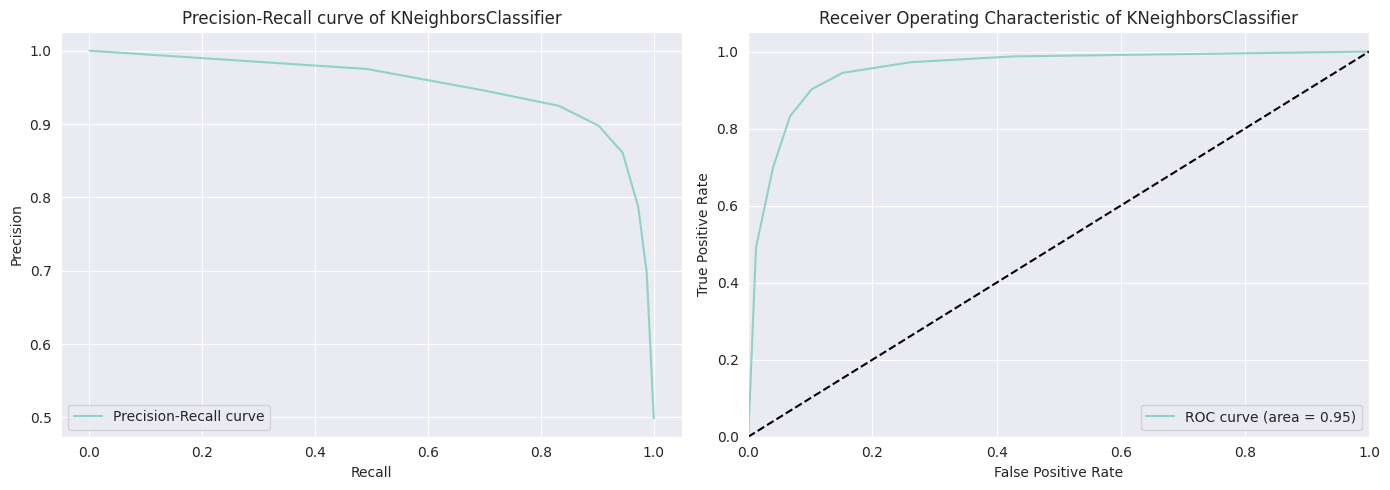

In [35]:
report_classifiers_curves(knn_validation_best)

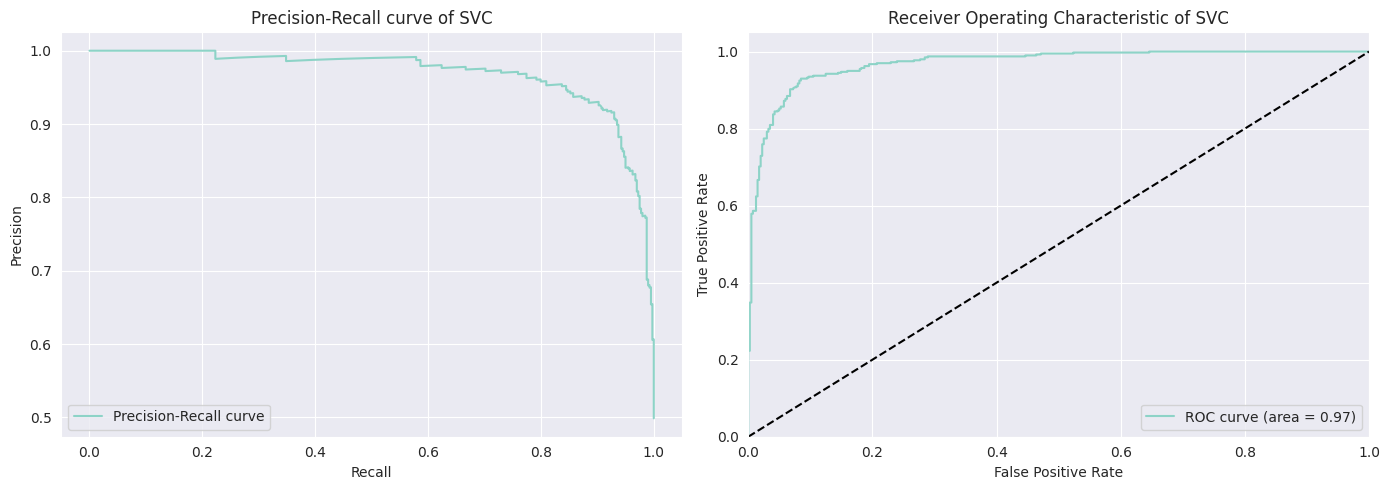

In [36]:
report_classifiers_curves(svc_model)

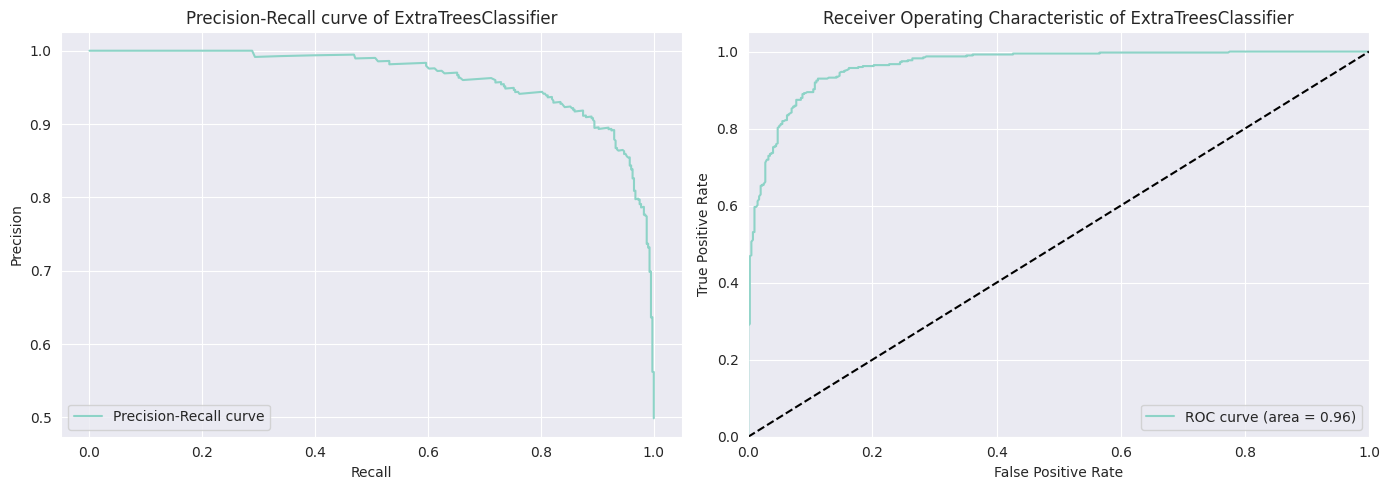

In [37]:
report_classifiers_curves(etc_model)

## 6. Performance Analysis

In this task, you are required to analyze the performance of your best model from the
previous part. To this end, examine instances in the test set where your model
exhibits errors (classification errors in case of classification tasks, or high MSE error in
case of regression). Try to find any interesting pattern in these examples.

In [38]:
# Use the best model to predict the labels for the test set
y_pred = svc_model.predict(X_test)

# Create a DataFrame from the test set
df_test = pd.DataFrame(X_test)

# Add the actual and predicted labels to the DataFrame
df_test['actual'] = y_test
df_test['predicted'] = y_pred

# Find instances where the model made incorrect predictions
df_errors = df_test[df_test['actual'] != df_test['predicted']]

# Analyze these instances to find any common patterns or characteristics
print(df_errors.describe().T)


             count      mean       std       min       25%       50%  \
Size          67.0 -0.255729  1.880964 -4.921336 -1.520249 -0.047807   
Weight        67.0 -0.857968  1.736765 -6.086894 -1.582233 -0.692104   
Sweetness     67.0 -0.386791  1.953837 -4.106682 -1.829695 -0.700877   
Crunchiness   67.0  1.208318  1.202672 -2.011756  0.441853  1.359634   
Juiciness     67.0 -0.038860  1.724483 -3.947638 -1.170369  0.046173   
Ripeness      67.0  0.612795  1.860831 -4.281312 -0.497137  0.406578   
Acidity       67.0  0.220960  1.630755 -3.873113 -0.940545  0.004236   
actual        67.0  0.552239  0.501017  0.000000  0.000000  1.000000   
predicted     67.0  0.447761  0.501017  0.000000  0.000000  0.000000   

                  75%       max  
Size         1.034856  3.834730  
Weight       0.204737  3.010306  
Sweetness    1.272901  4.686212  
Crunchiness  1.944506  4.153900  
Juiciness    0.919944  5.464513  
Ripeness     1.526716  5.553256  
Acidity      1.390024  4.902217  
actual 

The output above shows the statistical summary of the errors dataset.

In [39]:
def box_plot(data):
        
    # Create a boxplot for each feature in the df_errors DataFrame
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data)
    plt.title('Boxplots of Features in df_errors')
    #add scatter plot
    sns.stripplot(data=data, color='black')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
    plt.show()

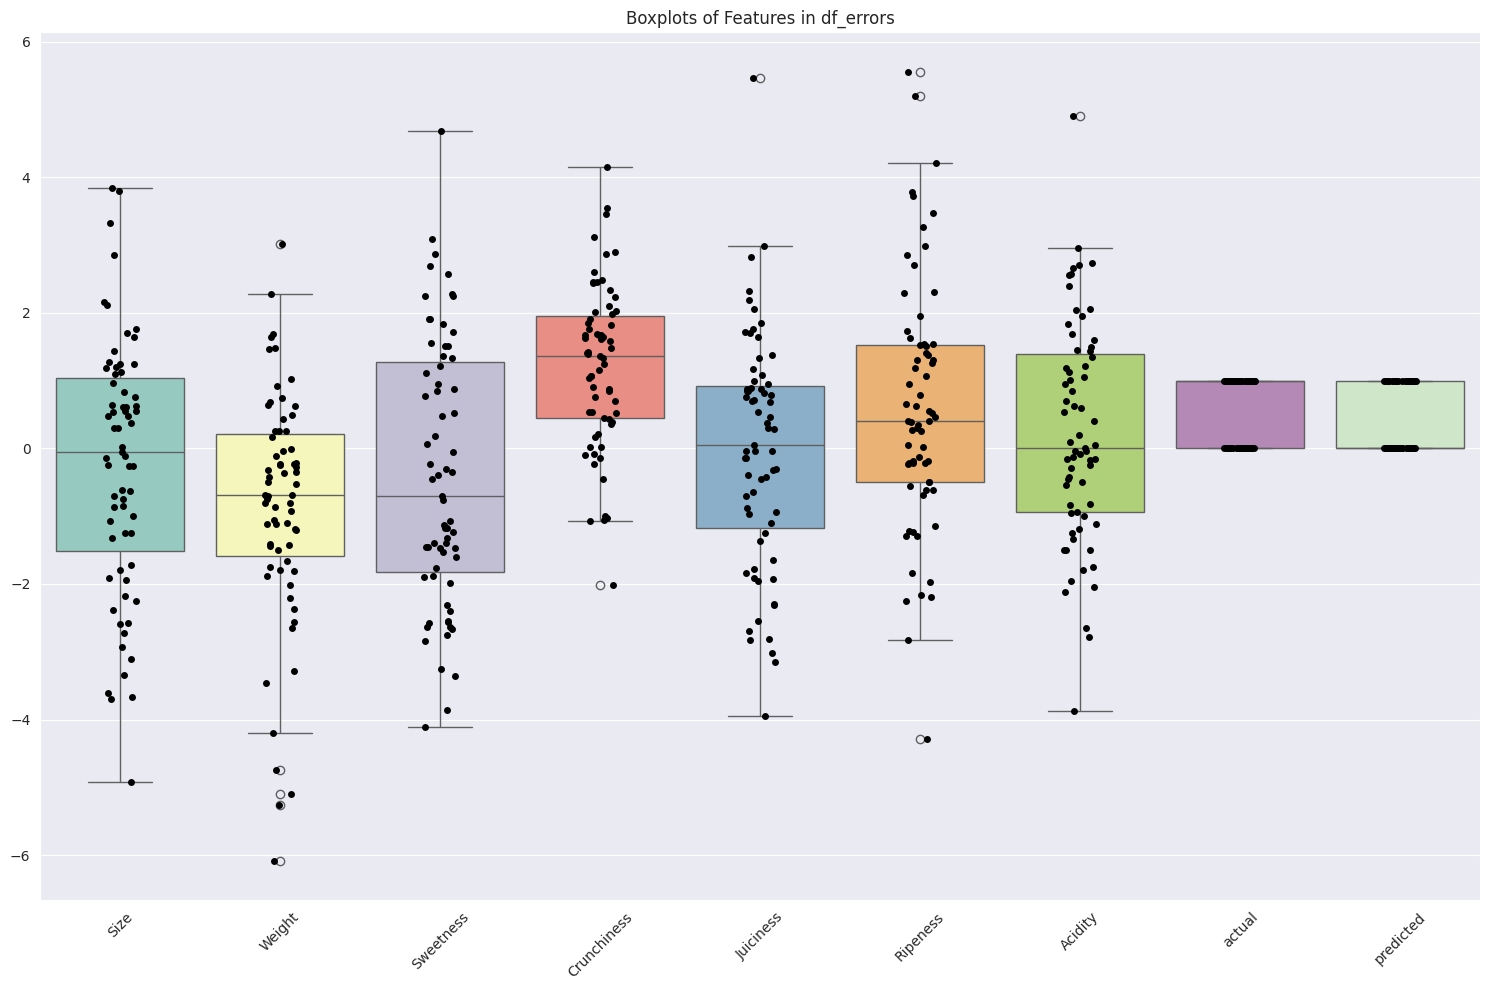

In [40]:
box_plot(df_errors)

In [45]:
print(df.describe().T)

              count      mean       std       min       25%       50%  \
Size         4000.0 -0.503015  1.928059 -7.151703 -1.816765 -0.513703   
Weight       4000.0 -0.989547  1.602507 -7.149848 -2.011770 -0.984736   
Sweetness    4000.0 -0.470479  1.943441 -6.894485 -1.738425 -0.504758   
Crunchiness  4000.0  0.985478  1.402757 -6.055058  0.062764  0.998249   
Juiciness    4000.0  0.512118  1.930286 -5.961897 -0.801286  0.534219   
Ripeness     4000.0  0.498277  1.874427 -5.864599 -0.771677  0.503445   
Acidity      4000.0  0.076877  2.110270 -7.010538 -1.377424  0.022609   
Quality      4000.0  0.501000  0.500062  0.000000  0.000000  1.000000   

                  75%       max  
Size         0.805526  6.406367  
Weight       0.030976  5.790714  
Sweetness    0.801922  6.374916  
Crunchiness  1.894234  7.619852  
Juiciness    1.835976  7.364403  
Ripeness     1.766212  7.237837  
Acidity      1.510493  7.404736  
Quality      1.000000  1.000000  


From the above output we can see that the mean of the errors dataset is close to the mean of the original dataset, which means that the errors dataset is not biased, and the standard deviation of the errors dataset is close to the standard deviation of the original dataset, which means that the errors dataset is not spread out.

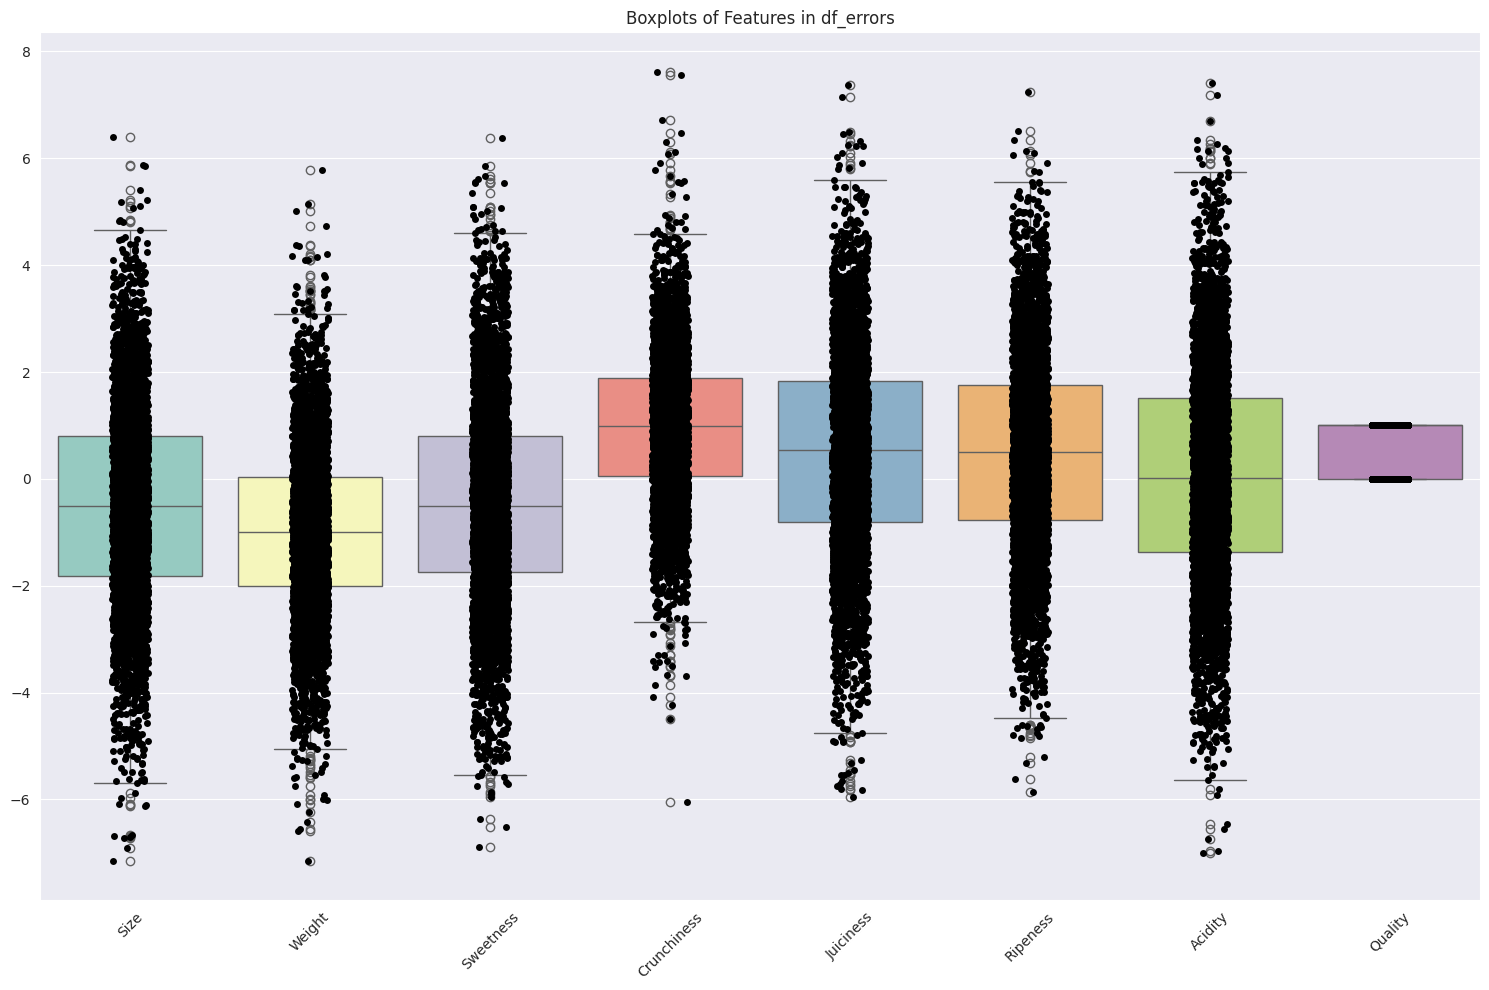

In [42]:
box_plot(df)

from Comparing dataset with errors dataset, There's no clear pattern in the errors dataset.